In [1]:
import pandas as pd 
import numpy as np

In [7]:
df = pd.read_csv("metrics/Assignment0_dataset_metrics.csv")

df.head()

,Seed,Epoch,Loss,Accuracy,Iteration,Total_iter
0,1,1,2.303600,5.761719,1,177
1,1,1,2.269716,23.535156,2,177
2,1,1,2.236255,33.984375,3,177
3,1,1,2.193143,40.625000,4,177
4,1,1,2.142449,43.945312,5,177


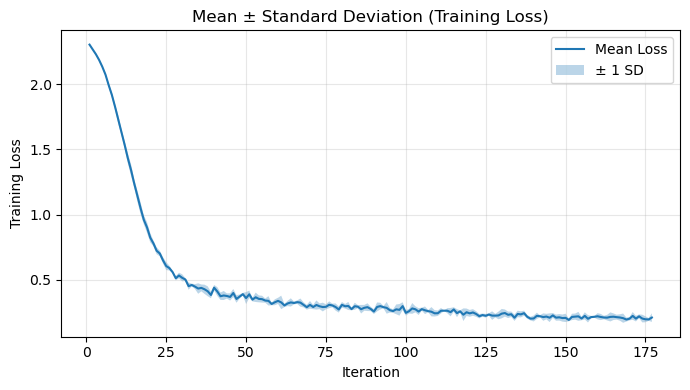

In [8]:
import matplotlib.pyplot as plt

# df is your DataFrame
# Group by iteration across seeds
stats = (
    df.groupby("Iteration")["Loss"]
      .agg(["mean", "std"])
      .reset_index()
)

x = stats["Iteration"]
mean_loss = stats["mean"]
std_loss = stats["std"]

plt.figure(figsize=(7, 4))

plt.plot(x, mean_loss, label="Mean Loss")
plt.fill_between(
    x,
    mean_loss - std_loss,
    mean_loss + std_loss,
    alpha=0.3,
    label="± 1 SD"
)

plt.xlabel("Iteration")
plt.ylabel("Training Loss")
plt.title("Mean ± Standard Deviation (Training Loss)")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("mean_sd_loss.png", dpi=200)
plt.show()


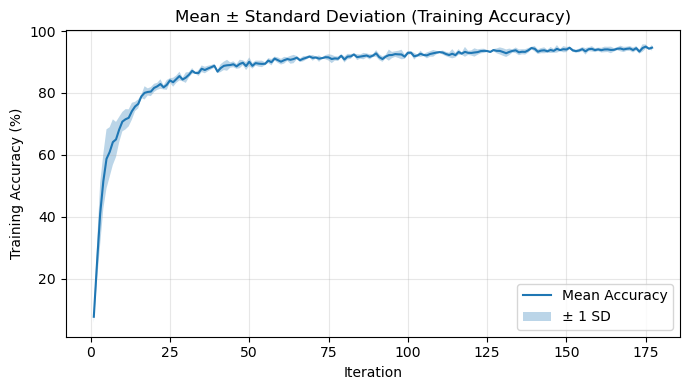

In [9]:
stats = (
    df.groupby("Iteration")["Accuracy"]
      .agg(["mean", "std"])
      .reset_index()
)

x = stats["Iteration"]
mean_acc = stats["mean"]
std_acc = stats["std"]

plt.figure(figsize=(7, 4))

plt.plot(x, mean_acc, label="Mean Accuracy")
plt.fill_between(
    x,
    mean_acc - std_acc,
    mean_acc + std_acc,
    alpha=0.3,
    label="± 1 SD"
)

plt.xlabel("Iteration")
plt.ylabel("Training Accuracy (%)")
plt.title("Mean ± Standard Deviation (Training Accuracy)")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("mean_sd_accuracy.png", dpi=200)
plt.show()


In [10]:
df.groupby("Iteration")["Seed"].nunique().head()


Iteration
1    5
2    5
3    5
4    5
5    5
Name: Seed, dtype: int64

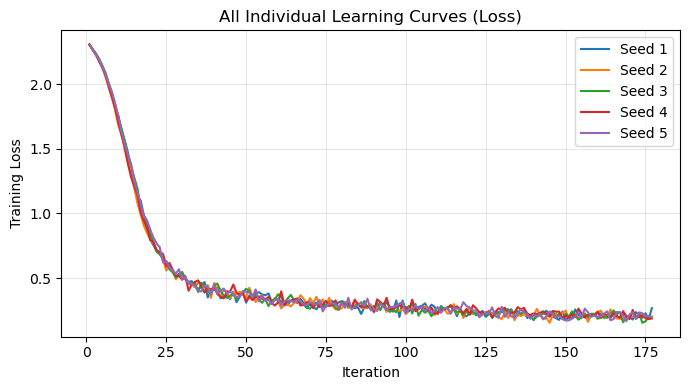

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))

for seed, dfr in df.groupby("Seed"):
    dfr = dfr.sort_values("Iteration")
    plt.plot(dfr["Iteration"], dfr["Loss"], label=f"Seed {seed}")

plt.xlabel("Iteration")
plt.ylabel("Training Loss")
plt.title("All Individual Learning Curves (Loss)")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("all_runs_loss.png", dpi=200)
plt.show()


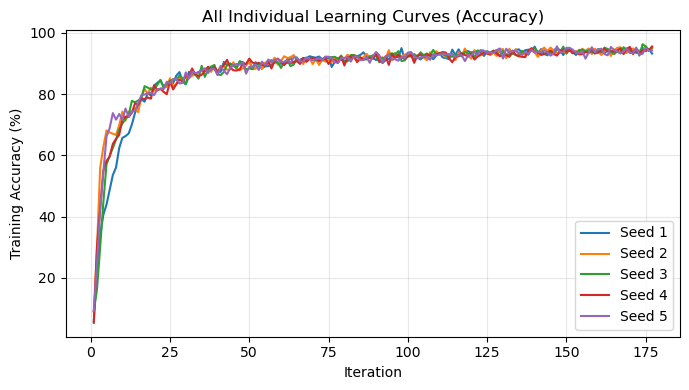

In [12]:
plt.figure(figsize=(7, 4))

for seed, dfr in df.groupby("Seed"):
    dfr = dfr.sort_values("Iteration")
    plt.plot(dfr["Iteration"], dfr["Accuracy"], label=f"Seed {seed}")

plt.xlabel("Iteration")
plt.ylabel("Training Accuracy (%)")
plt.title("All Individual Learning Curves (Accuracy)")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("all_runs_accuracy.png", dpi=200)
plt.show()


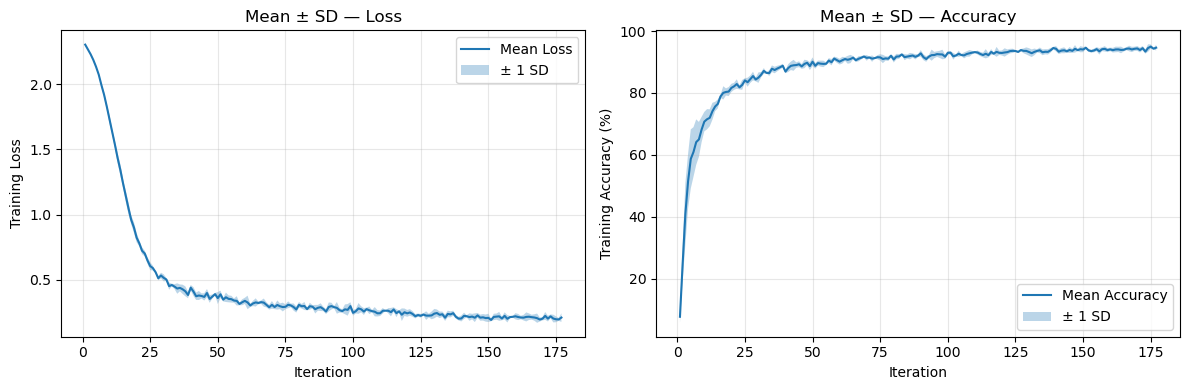

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Number of runs
n_runs = df["Seed"].nunique()

# ----- LOSS stats -----
loss_stats = (
    df.groupby("Iteration")["Loss"]
      .agg(["mean", "std"])
      .reset_index()
)

# ----- ACCURACY stats -----
acc_stats = (
    df.groupby("Iteration")["Accuracy"]
      .agg(["mean", "std"])
      .reset_index()
)

x = loss_stats["Iteration"]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# ===== Subplot 1: Loss =====
ax = axes[0]
ax.plot(x, loss_stats["mean"], label="Mean Loss")
ax.fill_between(
    x,
    loss_stats["mean"] - loss_stats["std"],
    loss_stats["mean"] + loss_stats["std"],
    alpha=0.3,
    label="± 1 SD"
)
ax.set_title("Mean ± SD — Loss")
ax.set_xlabel("Iteration")
ax.set_ylabel("Training Loss")
ax.legend()
ax.grid(True, alpha=0.3)

# ===== Subplot 2: Accuracy =====
ax = axes[1]
ax.plot(x, acc_stats["mean"], label="Mean Accuracy")
ax.fill_between(
    x,
    acc_stats["mean"] - acc_stats["std"],
    acc_stats["mean"] + acc_stats["std"],
    alpha=0.3,
    label="± 1 SD"
)
ax.set_title("Mean ± SD — Accuracy")
ax.set_xlabel("Iteration")
ax.set_ylabel("Training Accuracy (%)")
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("mean_sd.png", dpi=200)
plt.show()


In [37]:
class learning_curves:
    """
    This python class will help us build various learning curves with the metrics dataset created. 

    It is expected for the dataset to have the following columns: seed, epoch, iteration, total_iterations, accuracy, loss
    """
    def __init__(self, file_path: str):
        self.df = pd.read_csv(file_path)

    def mean_std_dev(self, output_path):
        n_runs = self.df["Seed"].nunique()

        metrics = ["Loss", "Accuracy"]

        fig, axes = plt.subplots(1,2,figsize=(12,4))
        for i,metric in enumerate(metrics):
            stats = (
                df.groupby("Iteration")[metric]
                .agg(["mean","std"])
                .reset_index()
            )

            x = stats["Iteration"]

            ax = axes[i]
            ax.plot(x,stats["mean"], label="Mean Loss")
            ax.fill_between(
                x,
                stats["mean"] - stats["std"],
                stats["mean"] + stats["std"],
                alpha=0.3,
                label = "+- 1 SD"
            )

            ax.set_title(f"Mean +- SD - {metric}")
            ax.set_xlabel("Iteration")
            ax.set_ylabel(f"Training {metric}")
            ax.legend()
            ax.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig("mean_sd.png",dpi = 2000)
        plt.show()
    
    def mean_se_dev(self, output_path):
        n_runs = self.df["Seed"].nunique()

        metrics = ["Loss", "Accuracy"]

        fig, axes = plt.subplots(1,2,figsize=(12,4))
        for i,metric in enumerate(metrics):
            stats = (
                df.groupby("Iteration")[metric]
                .agg(["mean","std"])
                .reset_index()
            )
            stats["ste"] = stats["std"] / (n_runs ** 0.5)

            x = stats["Iteration"]

            ax = axes[i]
            ax.plot(x,stats["mean"], label="Mean Loss")
            ax.fill_between(
                x,
                stats["mean"] - stats["ste"],
                stats["mean"] + stats["ste"],
                alpha=0.3,
                label = "+- 1 SE"
            )

            ax.set_title(f"Mean +- SE - {metric}")
            ax.set_xlabel("Iteration")
            ax.set_ylabel(f"Training {metric}")
            ax.legend()
            ax.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig("mean_se.png",dpi = 2000)
        plt.show()
    
    def all_curves(self):
        plt.figure(figsize = (7,4))
        n_runs = self.df["Seed"].nunique()

        for seed, dfr in df.groupby("Seed"):
            dfr = dfr.sort_values("Iteration")
            plt.plot(dfr["Iteration"], dfr["Accuracy"], label=f"Seed {seed}")
        
        plt.xlabel("Iteration")
        plt.ylabel("Training Accuracy (%)")
        plt.title("All Individual Learning Curves (Accuracy)")
        plt.legend()
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig("all_runs_accuracy.png", dpi=200)
        plt.show()


        

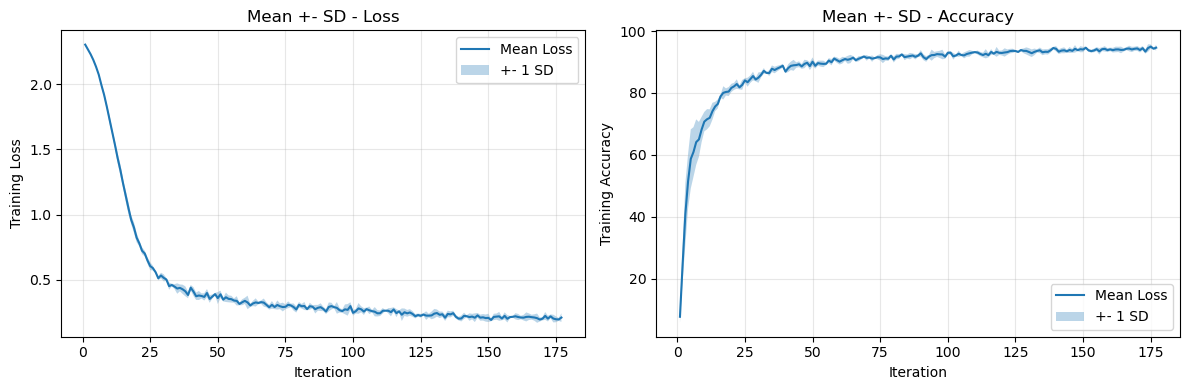

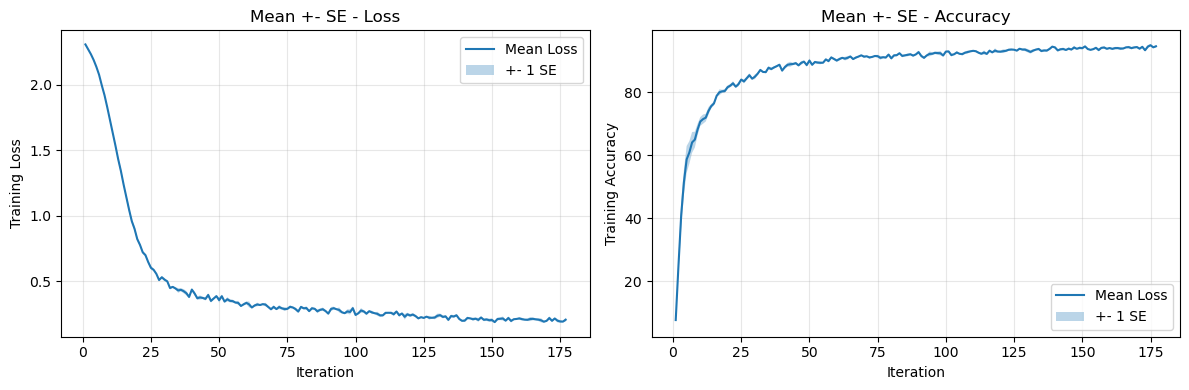

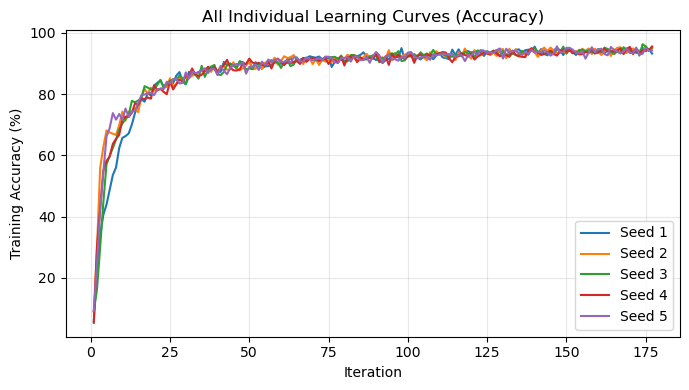

In [38]:
plot = learning_curves("metrics/Assignment0_dataset_metrics.csv")
plot.mean_std_dev("graph")
plot.mean_se_dev("graph")
plot.all_curves()